In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-06-29 16:54:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.253.122.128, 172.253.63.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   116MB/s    in 0.9s    

2023-06-29 16:54:03 (116 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
zipref = zipfile.ZipFile("pizza_steak.zip")
zipref.extractall()
zipref.close()

# Inspect the data (Become one with data)

In [4]:
import os

for dirpath, dirnames, filesnames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filesnames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [5]:
import pathlib
import numpy

data_dir = pathlib.Path("pizza_steak/train")
class_names = sorted([items.name for items in data_dir.glob("*")])

In [6]:
class_names

['pizza', 'steak']

#Visualising the data

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):

  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])

  plt.imshow(img)

  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape : {img.shape}")

  return img



Image shape : (512, 512, 3)


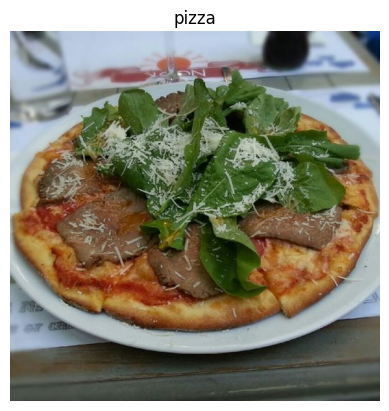

In [8]:
img = view_random_image("pizza_steak/train/", "pizza")

In [9]:
img.shape  # return width, height, color channels

(512, 512, 3)

# To build an CNN model

* Load our image
* Preprocess our images
* Build a CNN to find pattern in our images
* compile our CNN
* fit CNN to our training data

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [11]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [13]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))


In [14]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [15]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

history_3 = model_3.fit(train_data, epochs=10, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

In [16]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 10)                1505290   
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,505,521
Trainable params: 1,505,521
Non-trainable params: 0
_________________________________________________________________


Image shape : (512, 512, 3)
Image shape : (512, 512, 3)


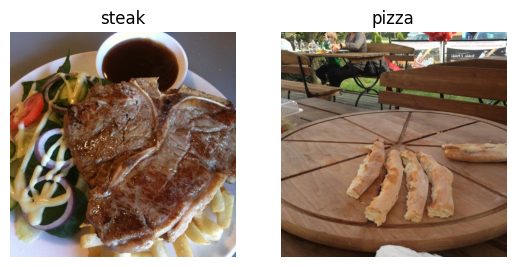

In [17]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")

plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [18]:
images, labels = train_data.next()

In [19]:
images

array([[[[0.42352945, 0.43137258, 0.34509805],
         [0.31764707, 0.3254902 , 0.2392157 ],
         [0.26666668, 0.28235295, 0.18431373],
         ...,
         [0.42352945, 0.34901962, 0.37254903],
         [0.427451  , 0.34901962, 0.39607847],
         [0.45098042, 0.36862746, 0.427451  ]],

        [[0.2901961 , 0.30588236, 0.21568629],
         [0.45882356, 0.47450984, 0.37647063],
         [0.2627451 , 0.28627452, 0.18431373],
         ...,
         [0.39607847, 0.34117648, 0.34117648],
         [0.4156863 , 0.36862746, 0.37647063],
         [0.39607847, 0.34901962, 0.3647059 ]],

        [[0.37254903, 0.39607847, 0.29411766],
         [0.39607847, 0.41960788, 0.31764707],
         [0.30588236, 0.34117648, 0.23529413],
         ...,
         [0.34509805, 0.3254902 , 0.3019608 ],
         [0.30980393, 0.29803923, 0.27058825],
         [0.3372549 , 0.3254902 , 0.30588236]],

        ...,

        [[0.5137255 , 0.5019608 , 0.54509807],
         [0.52156866, 0.50980395, 0.54509807]

In [20]:
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

# 1. Become one with data

Image shape : (512, 512, 3)
Image shape : (512, 382, 3)


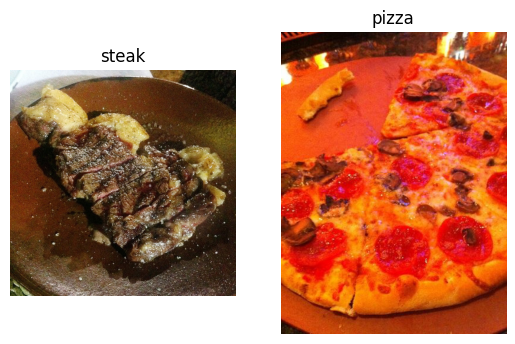

In [21]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")

plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

plt.show()

# 2. Preprocess the data (prepare it for model)

In [22]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Turn data into batches

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), class_mode='binary', batch_size=32)
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), class_mode='binary', batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [24]:
images, labels = train_data.next()

In [25]:
len(images), len(labels)

(32, 32)

#Create a CNN Model

In [31]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    # tf.keras.layers.Flatten(input_shape=(224, 224)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           activation='relu',
                           padding='valid',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_4.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# history_4 = model_4.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=test_data,
#                         validation_steps=len(test_data))

In [32]:
model_4.evaluate(test_data)

16/16 [==============================] - 18s 963ms/step - loss: 0.6959 - accuracy: 0.4760


[0.695858895778656, 0.47600001096725464]

In [33]:
import pandas as pd

# pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [34]:
def plot_loss_curve(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')

    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()

    # Plot accracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')

    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()


In [36]:
# plot_loss_curve(history_4)

when the model's validation loss starts to increase the model is **overfitting** the traing dataset.
This means the model is learning **to well** from the trainging dataset that is diminished on unseen data.

# Adjust the model parameters

Fitting a ML model comes in 3 steps:

1. Create a baseline.
2. Beat the baseline by overfitting a larger model
3. Reduce overfitting.

Ways to induce overfitting:

* Increase the number of Conv layers
* Increase the number of Conv filters
* Add another dense layer to the model


Ways to reduce overfitting:
* Add data augmentation
* Add regularization layer (pooling layer e.g maxpool)
* Add more data

In [37]:
# plot_loss_curve(history_1)

In [38]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_5.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 62s 1s/step - loss: 0.5931 - accuracy: 0.6900 - val_loss: 0.4339 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 61s 1s/step - loss: 0.4478 - accuracy: 0.8027 - val_loss: 0.3575 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 57s 1s/step - loss: 0.4109 - accuracy: 0.8187 - val_loss: 0.3566 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 59s 1s/step - loss: 0.3847 - accuracy: 0.8420 - val_loss: 0.3467 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 61s 1s/step - loss: 0.3518 - accuracy: 0.8460 - val_loss: 0.3517 - val_accuracy: 0.8480


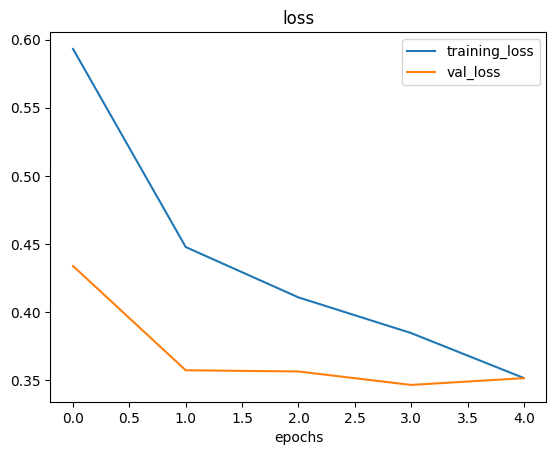

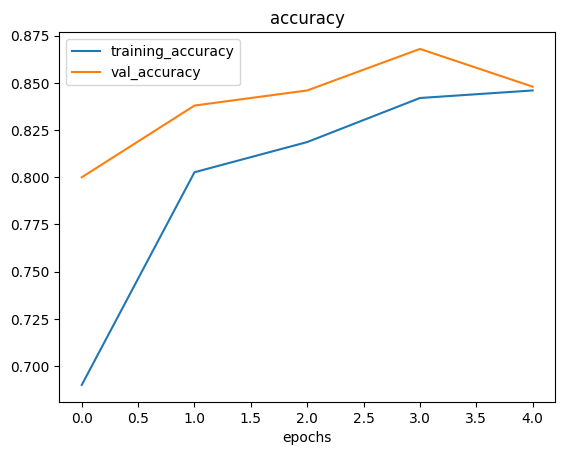

In [39]:
plot_loss_curve(history_5)

# Data augmentation

In [40]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                         target_size=(224, 224),
                                                         batch_size=32,
                                                         class_mode='binary',
                                                         shuffle=False)

train_data = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), class_mode='binary', batch_size=32, shuffle=False)
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), class_mode='binary', batch_size=32, shuffle=False)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [41]:
augmented_image, augmented_lables = train_data_augmented.next()
images, labels = train_data.next()

Showing random number: 6


(-0.5, 223.5, 223.5, -0.5)

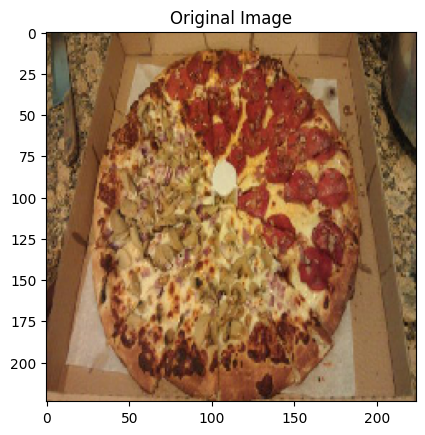

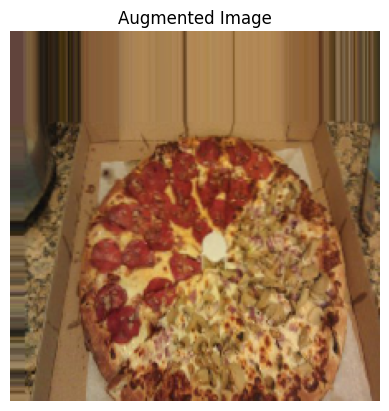

In [42]:
import random
random_number = random.randint(0, 32)
print(f'Showing random number: {random_number}')
plt.imshow(images[random_number])
plt.title(f"Original Image")

plt.figure()
plt.imshow(augmented_image[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

In [43]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, input_shape=(224, 224, 3), activation='relu'),
    # tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 74s 2s/step - loss: 0.7160 - accuracy: 0.4580 - val_loss: 0.6884 - val_accuracy: 0.5400
Epoch 2/5
47/47 [==============================] - 71s 2s/step - loss: 0.6949 - accuracy: 0.5120 - val_loss: 0.6865 - val_accuracy: 0.5100
Epoch 3/5
47/47 [==============================] - 71s 2s/step - loss: 0.6914 - accuracy: 0.5440 - val_loss: 0.6728 - val_accuracy: 0.7800
Epoch 4/5
47/47 [==============================] - 74s 2s/step - loss: 0.6906 - accuracy: 0.5400 - val_loss: 0.6689 - val_accuracy: 0.5440
Epoch 5/5
47/47 [==============================] - 74s 2s/step - loss: 0.6721 - accuracy: 0.5433 - val_loss: 0.6086 - val_accuracy: 0.6600


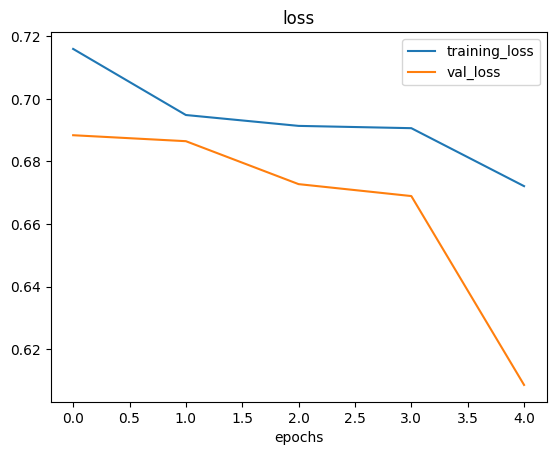

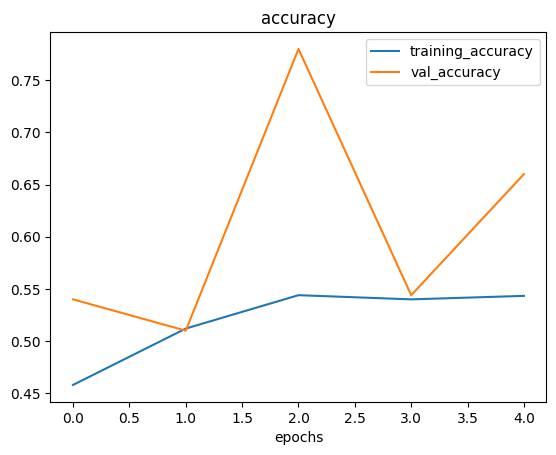

In [44]:
plot_loss_curve(history_6)

In [45]:
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                       rotation_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True)

train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       batch_size=32,
                                                       class_mode='binary',
                                                       target_size=(224, 224),
                                                       shuffle=True)

Found 1500 images belonging to 2 classes.


In [66]:
model_7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, input_shape=(224, 224, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

history_7 = model_7.fit(train_data_aug,
                        epochs=10,
                        steps_per_epoch=len(train_data_aug),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 77s 2s/step - loss: 0.6549 - accuracy: 0.6047 - val_loss: 0.4866 - val_accuracy: 0.7740
Epoch 2/10
47/47 [==============================] - 75s 2s/step - loss: 0.5205 - accuracy: 0.7520 - val_loss: 0.3764 - val_accuracy: 0.8480
Epoch 3/10
47/47 [==============================] - 74s 2s/step - loss: 0.4957 - accuracy: 0.7687 - val_loss: 0.4327 - val_accuracy: 0.7940
Epoch 4/10
47/47 [==============================] - 74s 2s/step - loss: 0.4844 - accuracy: 0.7800 - val_loss: 0.3548 - val_accuracy: 0.8540
Epoch 5/10
47/47 [==============================] - 75s 2s/step - loss: 0.4580 - accuracy: 0.8007 - val_loss: 0.4342 - val_accuracy: 0.7840
Epoch 6/10
47/47 [==============================] - 75s 2s/step - loss: 0.4597 - accuracy: 0.8033 - val_loss: 0.3716 - val_accuracy: 0.8480
Epoch 7/10
47/47 [==============================] - 72s 2s/step - loss: 0.4247 - accuracy: 0.8200 - val_loss: 0.2843 - val_accuracy: 0.8980
Epoch 8/10
47/47 [==

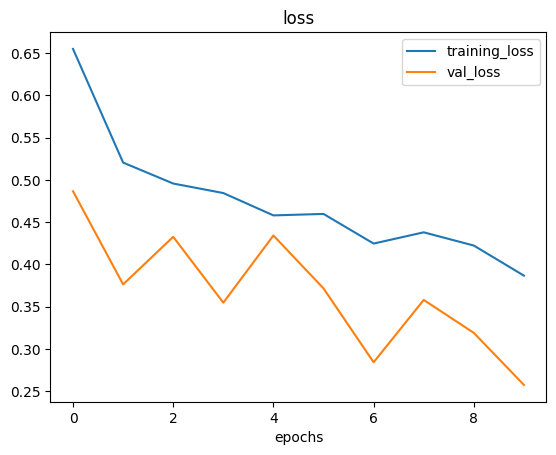

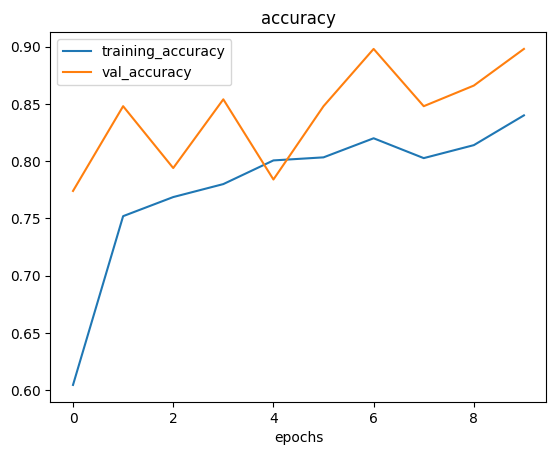

In [67]:
plot_loss_curve(history_7)

# Repeat Until Satisfy

# Let make prediction

In [48]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-06-29 17:18:00--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2023-06-29 17:18:00 (181 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



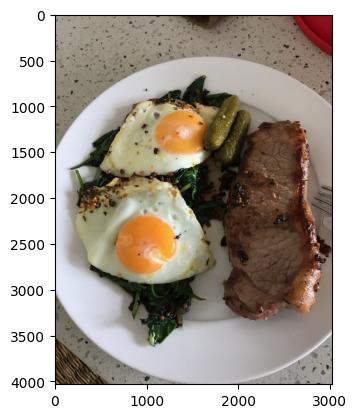

In [68]:
# !ls
import matplotlib.image as mpimg
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)

In [50]:
steak.shape

(4032, 3024, 3)

In [51]:
expanded_steak = tf.expand_dims(steak, axis=0)
expanded_steak.shape

TensorShape([1, 4032, 3024, 3])

In [53]:
def load_and_prep_image(filename, img_shape=224):
    img = tf.io.read_file(filename)

    #decode
    img = tf.image.decode_image(img)
    img = tf.image.resize(img, size=[img_shape, img_shape])
    img = img/255.

    return img

In [54]:
steak = load_and_prep_image('03-steak.jpeg')

In [55]:
steak.shape

TensorShape([224, 224, 3])

In [64]:
def pred_and_plot(model, filename, class_names=class_names):
    img = load_and_prep_image(filename)

    pred = model.predict(tf.expand_dims(img, axis=0))
    print(pred)
    pred_class = class_names[int(tf.round(pred))]

    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')
    plt.axis(False)
    return pred_class


1/1 [==============================] - 0s 78ms/step
[[0.8308626]]


'steak'

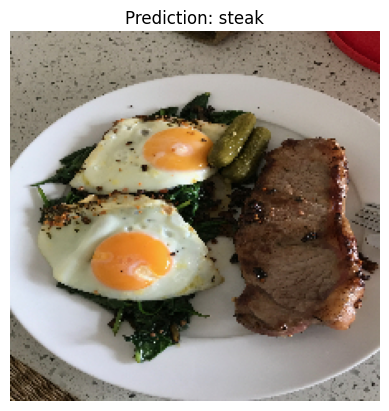

In [69]:
pred_and_plot(model_7, '03-steak.jpeg')

In [61]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2023-06-29 17:22:48--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-06-29 17:22:49 (198 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



1/1 [==============================] - 0s 30ms/step
[[0.20323859]]


'pizza'

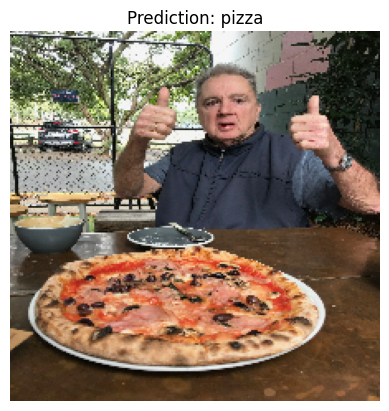

In [70]:
# pizza = mpimg.imread('03-pizza-dad.jpeg')
pred_and_plot(model_7, '03-pizza-dad.jpeg')

In [76]:
!wget https://www.shutterstock.com/image-photo/concept-promotional-flyer-poster-restaurants-260nw-1060535249.jpg

--2023-06-29 17:47:19--  https://www.shutterstock.com/image-photo/concept-promotional-flyer-poster-restaurants-260nw-1060535249.jpg
Resolving www.shutterstock.com (www.shutterstock.com)... 18.67.76.64, 18.67.76.87, 18.67.76.112, ...
Connecting to www.shutterstock.com (www.shutterstock.com)|18.67.76.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33388 (33K) [image/jpeg]
Saving to: ‘concept-promotional-flyer-poster-restaurants-260nw-1060535249.jpg’

concept-promotional 100%[===================>]  32.61K  --.-KB/s    in 0s      

2023-06-29 17:47:19 (204 MB/s) - ‘concept-promotional-flyer-poster-restaurants-260nw-1060535249.jpg’ saved [33388/33388]



1/1 [==============================] - 0s 30ms/step
[[0.26992774]]


'pizza'

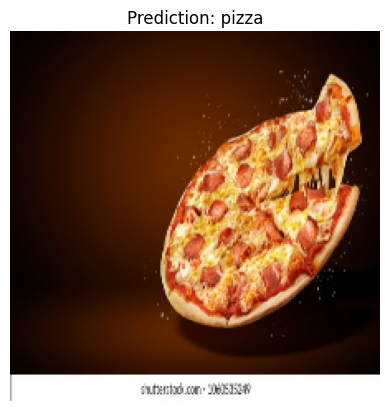

In [77]:
pred_and_plot(model_7, 'concept-promotional-flyer-poster-restaurants-260nw-1060535249.jpg')